In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

Shape of the train data is:  (1070, 9)

Statistical Properties of the train data are as follows: 
                Id          age          sex          bmi     children  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean    668.617757    39.030841     0.495327    30.490196     1.128037   
std     385.470930    13.951271     0.500212     6.109707     1.211675   
min       1.000000    18.000000     0.000000    15.960000     0.000000   
25%     333.250000    27.000000     0.000000    26.030000     0.000000   
50%     676.500000    39.000000     0.000000    30.140000     1.000000   
75%    1000.500000    51.000000     1.000000    34.320000     2.000000   
max    1337.000000    64.000000     1.000000    53.130000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1070.000000  1070.000000   1070.000000     1070.000000  
mean      0.203738     1.516822  13262.895208        0.568224  
std       0.402965     1.110035  12125.9482

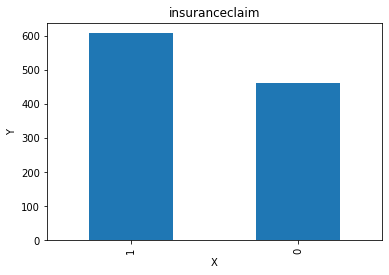

In [3]:
# Code starts here

# Load the train data
train = pd.read_csv('train.csv')

# Shape of the data
print('Shape of the train data is: ',train.shape)

print()

# Statistical properties of the data.
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

# Drop the Id.
train.drop('Id',axis=1,inplace=True)

# Checking for the class distribution of the target
train['insuranceclaim'].value_counts().plot(kind='bar')
plt.title('insuranceclaim')
plt.xlabel('X')
plt.ylabel('Y')

print()

# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())

# Code ends here.

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

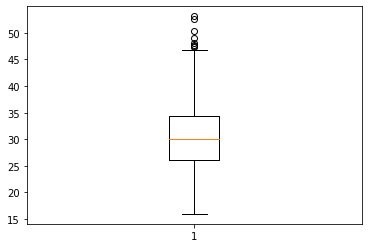

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [4]:
# Code starts here

# Using boxpolt, check for Outliers. Plot the boxplot 

plt.boxplot(train['bmi'])

plt.show()
# set quantile (0.95)
q_value = train['bmi'].quantile(0.95)

# Check the value counts of the target
train['insuranceclaim'].value_counts(normalize=True)

# Code ends here.

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400   
sex            -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674   
bmi             0.091499  0.047436  1.000000  0.033350  0.005660  0.158037   
children        0.061800  0.032628  0.033350  1.000000  0.021243  0.027956   
smoker         -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970   
region          0.006400  0.018674  0.158037  0.027956  0.006970  1.000000   
charges         0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329   
insuranceclaim  0.083923  0.022043  0.366515 -0.386124  0.342564  0.014917   

                 charges  insuranceclaim  
age             0.316429        0.083923  
sex             0.057600        0.022043  
bmi             0.197609        0.366515  
children        0.088766       -0.386124  
smoker          0.778644        0.342564  
region         -0.001329        0.01491

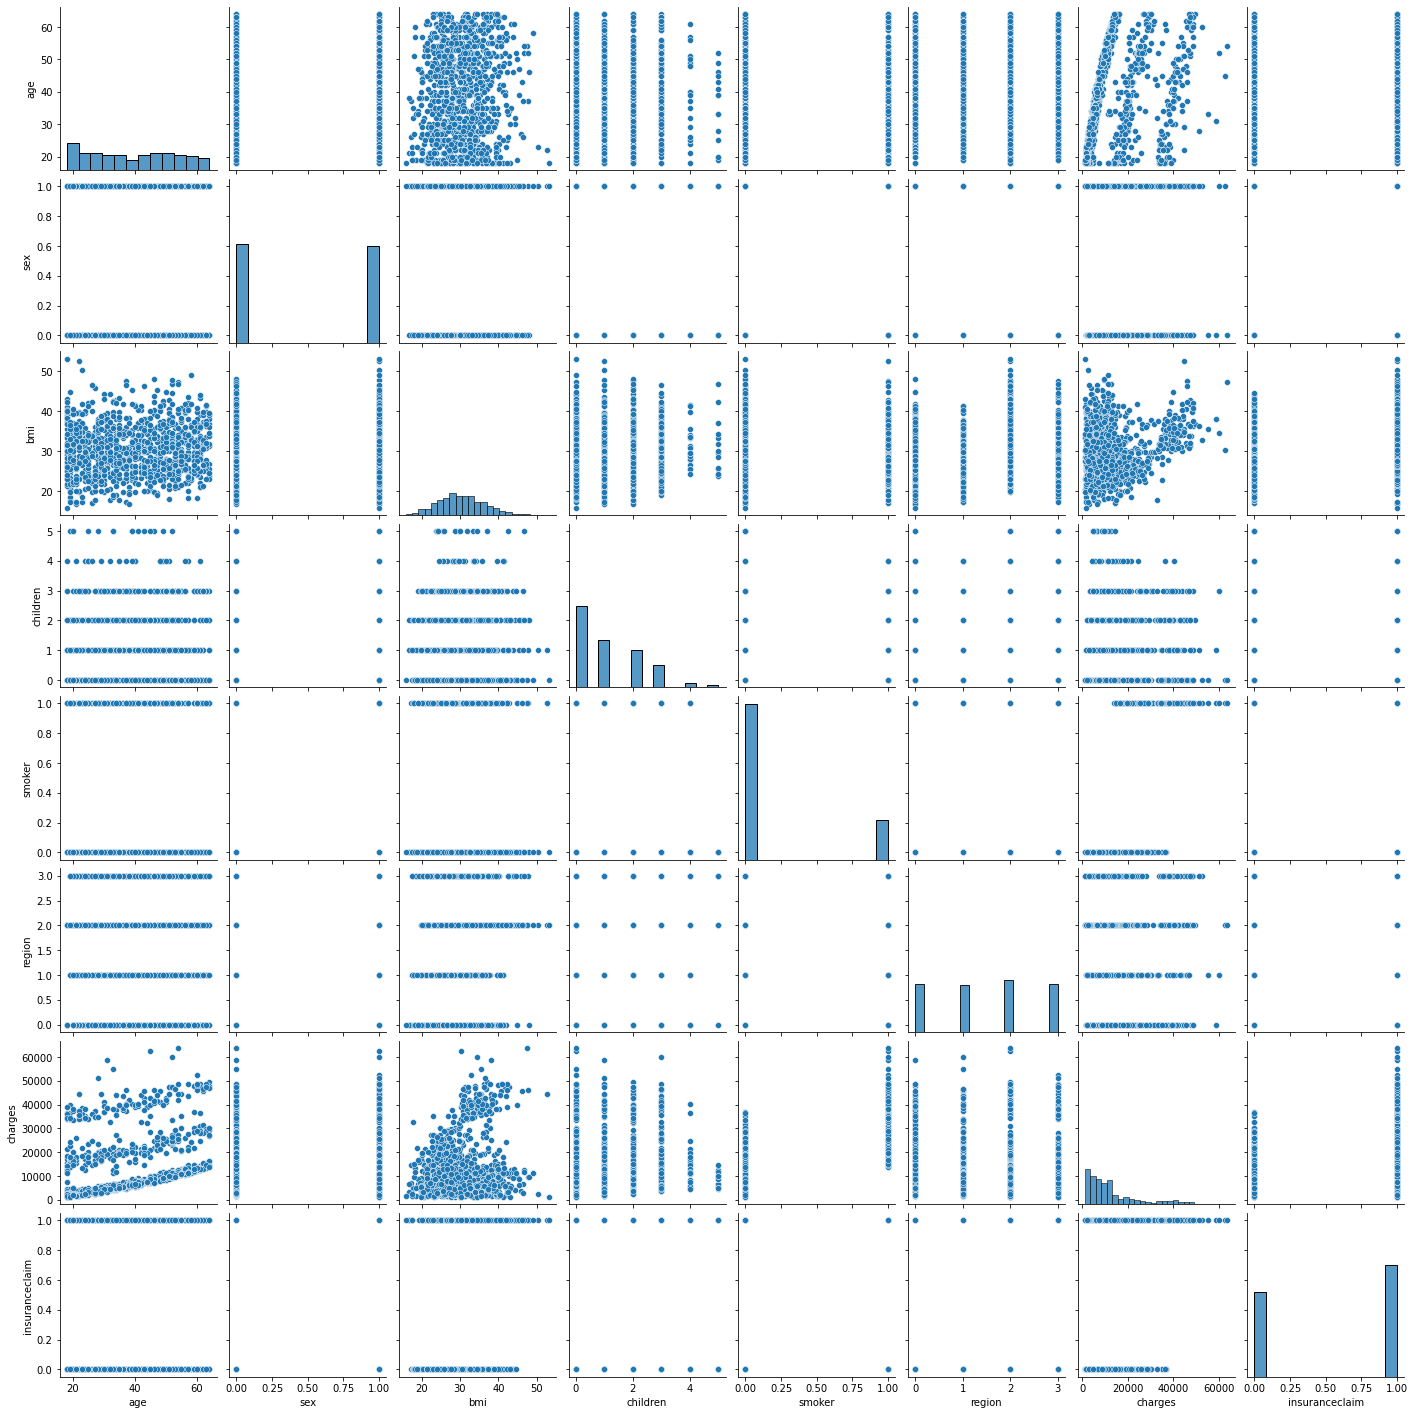

In [5]:
# check the correlation of X_train
relation = train.corr()
print(relation)

# Check the pair_plot for feature vs feature.This tells us which features are highly correlated with the other feature and 
# help us predict its better logistic regression model.
# create heatmap using seaborn
sns.pairplot(train)

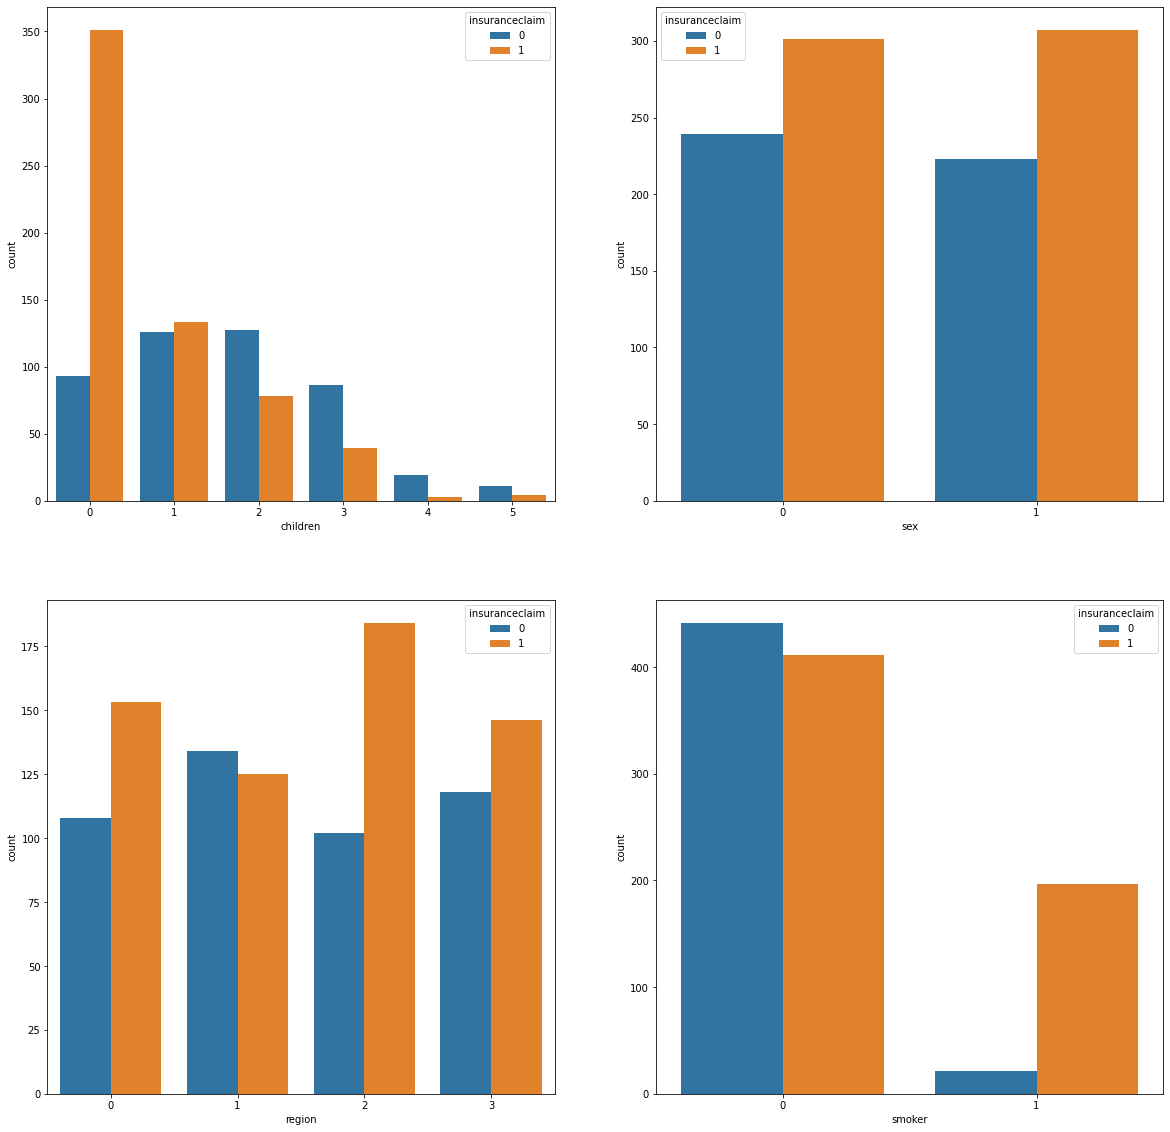

In [6]:
# Check the count_plot for different features vs target variable insuranceclaim. 
# This tells us which features are highly correlated with the target variable insuranceclaim and help us predict it better.

# store categorical variable
cols = ['children','sex','region','smoker']
        


# create subplot 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# create loop for plotting countplot

for i in range(0,2):
    for j in range(0,2):
             col=cols[i*2 + j]
             sns.countplot(x=train[col], hue=train['insuranceclaim'], ax=axes[i,j])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [7]:
# Code starts here

# Using logistic regression to predict the insuranceclaim, train your model. 
# We will select the best model by cross-validation using Grid Search.

# store independent variable
X = train.drop('insuranceclaim',axis=1)

# store dependent variable
y = train['insuranceclaim']

# spliting the dataset
X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.2,random_state=6)

# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)

# grid search on logistic regression
grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_val)
accuracy= accuracy_score(y_pred,y_val)

print(accuracy)

score = roc_auc_score( y_val, y_pred)
print(score)

# Code ends here.

0.7850467289719626
0.7840501792114696


0.8836060562324096
0.8644265232974911


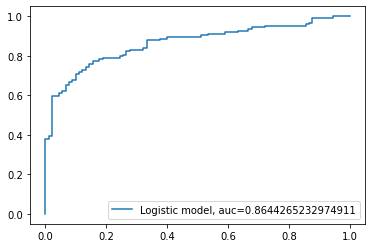

In [8]:
# Lastly,  visualize the performance of a binary classifier. Check the performance of the classifier using roc auc curve.

y_pred_proba = grid.predict_proba(X_val)[:,1]
print(y_pred_proba[0])

fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [25]:
# Code starts here

# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Applying same transformation on test
test.drop('Id',axis=1,inplace=True)

# make predictions 
y_pred_test = grid.predict_proba(test)[:,1]

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'insuranceclaim':y_pred_test})
sample_submission.insuranceclaim = sample_submission.insuranceclaim.round()

# Convert the sample submission file into a csv file
sample_submission.to_csv('submission1.csv',index=False)

# Code ends here.